In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
%metal_heading Etching Square

In [2]:
design_S = designs.DesignPlanar({}, True)
design_S.chips.main.size['size_x'] = '6mm'
design_S.chips.main.size['size_y'] = '6mm'

gui = MetalGUI(design_S)
from qiskit_metal.qlibrary.sample_shapes.rectangle import Rectangle

Rectangle(design_S, 'S_Etch', {'width': '5000um' ,'height': '5000um', 'pos_x': '0mm','pos_y': '0mm', 'subtract': 'False'})

gui.rebuild()
gui.autoscale()

03:07PM 06s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 650 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



In [4]:
a_gds = design_S.renderers.gds
print(a_gds.options)

a_gds.options['fabricate'] = 'True'
a_gds.options['cheese']['view_in_file']['main'][1] = False
a_gds.options['no_cheese']['view_in_file']['main'][1] = False

all_component_names = design_S.components.keys()
print(all_component_names)

a_gds.options['positive_mask'] = Dict(main=[1])
a_gds.export_to_gds('Etching_Square.gds')

03:07PM 45s WARNING [_qgeometry_to_gds]: Unexpected shapely object geometry.The variable qgeometry_element is <class 'numpy.float64'>, method can currently handle Polygon and FlexPath.
03:07PM 45s WARNING [_import_junctions_to_one_cell]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"/Users/alexromm./resources".


{'short_segments_to_not_fillet': 'True', 'check_short_segments_by_scaling_fillet': '2.0', 'gds_unit': 0.001, 'ground_plane': 'True', 'negative_mask': {'main': []}, 'fabricate': 'False', 'corners': 'circular bend', 'tolerance': '0.00001', 'precision': '0.000000001', 'width_LineString': '10um', 'path_filename': '../resources/Fake_Junctions.GDS', 'junction_pad_overlap': '5um', 'max_points': '199', 'cheese': {'datatype': '100', 'shape': '0', 'cheese_0_x': '25um', 'cheese_0_y': '25um', 'cheese_1_radius': '100um', 'view_in_file': {'main': {1: True}}, 'delta_x': '100um', 'delta_y': '100um', 'edge_nocheese': '200um'}, 'no_cheese': {'datatype': '99', 'buffer': '25um', 'cap_style': '2', 'join_style': '2', 'view_in_file': {'main': {1: True}}}, 'bounding_box_scale_x': '1.2', 'bounding_box_scale_y': '1.2'}
['S_Etch']


1

In [2]:
%metal_heading 4 CPW Hanger resonators coupled to a feedline

## Create the design in Metal
Set up a design of a given dimension. Dimensions will be respected in the design rendering.
<br>
Note the chip design is centered at origin (0,0). 

In [3]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '10mm'
design.chips.main.size['size_y'] = '10mm'

gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.sample_shapes.rectangle import Rectangle

## 1) Adding dicing corners

In [6]:
Rectangle(design, 'R1A', {'width': '600um' ,'height': '250um', 'pos_x': '-4.7mm','pos_y': '-4.875mm', 'subtract': 'True'})
Rectangle(design, 'R1B', {'width': '250um' ,'height': '300um', 'pos_x': '-4.875mm','pos_y': '-4.6mm', 'subtract': 'True'})

Rectangle(design, 'R2A', {'width': '600um' ,'height': '250um', 'pos_x': '4.7mm','pos_y': '4.875mm', 'subtract': 'True'})
Rectangle(design, 'R2B', {'width': '250um' ,'height': '300um', 'pos_x': '4.875mm','pos_y': '4.6mm', 'subtract': 'True'})

Rectangle(design, 'R3A', {'width': '600um' ,'height': '250um', 'pos_x': '-4.7mm','pos_y': '4.875mm', 'subtract': 'True'})
Rectangle(design, 'R3B', {'width': '250um' ,'height': '300um', 'pos_x': '-4.875mm','pos_y': '4.6mm', 'subtract': 'True'})

Rectangle(design, 'R4A', {'width': '600um' ,'height': '250um', 'pos_x': '4.7mm','pos_y': '-4.875mm', 'subtract': 'True'})
Rectangle(design, 'R4B', {'width': '250um' ,'height': '300um', 'pos_x': '4.875mm','pos_y': '-4.6mm', 'subtract': 'True'})

gui.rebuild()
gui.autoscale()

## 2) Adding 4 hangers capacitively coupled to a feedline

In [7]:
#Default sets the termination of the second line at the coupling side to open 

TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='-2.25mm',
                                             pos_y='0mm',
                                             coupling_space = '12um',
                                             coupling_length='100um'))

TQ2 = CoupledLineTee(design, 'TQ2', options=dict(pos_x='-0.75mm',
                                             pos_y='0mm',
                                             coupling_space = '12um',
                                             coupling_length='150um', 
                                             mirror = True,
                                             orientation = 180))

TQ3 = CoupledLineTee(design, 'TQ3', options=dict(pos_x='0.75mm',
                                             pos_y='0mm',
                                             coupling_space = '12um',
                                             coupling_length='200um'))

TQ4 = CoupledLineTee(design, 'TQ4', options=dict(pos_x='2.25mm',
                                             pos_y='0mm',
                                             coupling_space = '12um',
                                             coupling_length='250um',
                                             mirror = True,
                                             orientation = 180))

gui.rebuild()
gui.autoscale()

TQ1.qgeometry_table

<bound method QComponent.qgeometry_table of name:    TQ1
class:   CoupledLineTee        
options: 
  'pos_x'             : '-2.25mm',                    
  'pos_y'             : '0mm',                        
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'prime_width'       : '10um',                       
  'prime_gap'         : '6um',                        
  'second_width'      : '10um',                       
  'second_gap'        : '6um',                        
  'coupling_space'    : '12um',                       
  'coupling_length'   : '100um',                      
  'down_length'       : '100um',                      
  'fillet'            : '25um',                       
  'mirror'            : False,                        
  'open_termination'  : True,                         
  'hfss_wire_bonds'   : False,                        
  'q3d_wire_bonds'   

1   HIToolbox                           0x00007ff82236f726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff82236f2b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff8222decd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff82236f173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff81b83224b -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff81b687005 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   CoreFoundation                      0x00007ff8184616c6 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 137
8   CoreFoundation                      0x00007ff8184facac ___CFXRegistrationPost_block_invoke + 86
9   CoreFoundation                      0x00007ff8184fac03 _CFXR

## 3) Adding meandered CPWs coupled to the feedline

In [8]:
ops=dict(fillet='90um')
design.overwrite_enabled = True

otg = OpenToGround(design, 'end_CPW1', options=dict(pos_x='-2.25mm',  pos_y='-2.5mm', orientation='0'))

#Resonator with w0~7GHz
options1 = Dict(total_length='8.482mm',hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(component='TQ1',pin='second_end'),
        end_pin=Dict(component='end_CPW1', pin='open')),
    lead=Dict(start_straight='0.1mm'),**ops)

CPW1 = RouteMeander(design, 'CPW1', options=options1)


##################################################################

otg = OpenToGround(design, 'end_CPW2', options=dict(pos_x='-0.75mm',  pos_y='2.5mm', orientation='0'))

#Resonator with w0~7.5GHz
options2 = Dict(total_length='7.86mm',hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(component='TQ2',pin='second_end'),
        end_pin=Dict(component='end_CPW2', pin='open')),
    lead=Dict(start_straight='0.1mm'),**ops)

CPW2 = RouteMeander(design, 'CPW2', options=options2)


##################################################################

otg = OpenToGround(design, 'end_CPW3', options=dict(pos_x='0.75mm',  pos_y='-2.5mm', orientation='0'))

#Resonator with w0~8GHz
options3 = Dict(total_length='7.309mm',hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(component='TQ3',pin='second_end'),
        end_pin=Dict(component='end_CPW3', pin='open')),
    lead=Dict(start_straight='0.1mm'),**ops)

CPW3 = RouteMeander(design, 'CPW3', options=options3)

##################################################################

otg = OpenToGround(design, 'end_CPW4', options=dict(pos_x='2.35mm',  pos_y='2.5mm', orientation='0'))

#Resonator with w0~8.5GHz
options4 = Dict(total_length='6.82mm',hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(component='TQ4',pin='second_end'),
        end_pin=Dict(component='end_CPW4', pin='open')),
    lead=Dict(start_straight='0.1mm'),**ops)

CPW4 = RouteMeander(design, 'CPW4', options=options4)


gui.rebuild()
gui.autoscale()

1   HIToolbox                           0x00007ff82236f726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff822338638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81cfd323d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81d2e605a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81d2e5f81 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff8182107fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff818211a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff81821e7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff81821e3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

## 4) Adding launchers at the ends of the feedline

In [9]:
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

lpA = LaunchpadWirebond(design, 'LauncherA', options =  dict(pos_x='-3.7mm', pos_y='0mm', orientation='0', lead_length='0um'))
lpB = LaunchpadWirebond(design, 'LauncherB', options =  dict(pos_x='3.7mm', pos_y='0mm', orientation='180', lead_length='0um'))

print(lpA.pin_names)

gui.rebuild()
gui.autoscale()

{'tie'}


1   HIToolbox                           0x00007ff82236f726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff822338638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81cfd323d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81d2e605a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81d2e5f81 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff8182107fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff818211a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff81821e7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff81821e3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

## 5) Adding straight CPWs that comprise the feedline

In [10]:
ops_b1 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                 start_pin=Dict(component='TQ1',pin='prime_start'),
                 end_pin=Dict(component='LauncherA',pin='tie')))

ops_e4 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                  start_pin=Dict(component='TQ4',pin='prime_start'),
                 end_pin=Dict(component='LauncherB',pin='tie')))

ops_l12 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                  start_pin=Dict(component='TQ1',pin='prime_end'),
                 end_pin=Dict(component='TQ2',pin='prime_end')))

ops_l23 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                  start_pin=Dict(component='TQ2',pin='prime_start'),
                 end_pin=Dict(component='TQ3',pin='prime_start')))

ops_l34 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                  start_pin=Dict(component='TQ3',pin='prime_end'),
                 end_pin=Dict(component='TQ4',pin='prime_end')))

cpw_launcher1 = RouteStraight(design, 'cpw_launcher1', options=ops_b1)
cpw_launcher4 = RouteStraight(design, 'cpw_launcher4', options=ops_e4)
cpw_line12 = RouteStraight(design, 'cpw_line12', options=ops_l12)
cpw_line23 = RouteStraight(design, 'cpw_line23', options=ops_l23)
cpw_line34 = RouteStraight(design, 'cpw_line34', options=ops_l34)

gui.rebuild()
gui.autoscale()
#gui.screenshot()

1   HIToolbox                           0x00007ff82236f726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff822338638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81cfd323d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81d2e605a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81d2e5f81 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff8182107fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff818211a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff81821e7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff81821e3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [10]:
%metal_heading Exporting the gds file

In [11]:
a_gds = design.renderers.gds
print(a_gds.options)

a_gds.options['fabricate'] = 'True'

a_gds.options['cheese']['view_in_file']['main'][1] = False
a_gds.options['no_cheese']['view_in_file']['main'][1] = False

all_component_names = design.components.keys()
print(all_component_names)

a_gds.options['negative_mask'] = Dict(main=[1])

a_gds.export_to_gds('HangerCPWs_v1.gds')

03:08PM 51s WARNING [_import_junctions_to_one_cell]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"/Users/alexromm./resources".


{'short_segments_to_not_fillet': 'True', 'check_short_segments_by_scaling_fillet': '2.0', 'gds_unit': 0.001, 'ground_plane': 'True', 'negative_mask': {'main': []}, 'fabricate': 'False', 'corners': 'circular bend', 'tolerance': '0.00001', 'precision': '0.000000001', 'width_LineString': '10um', 'path_filename': '../resources/Fake_Junctions.GDS', 'junction_pad_overlap': '5um', 'max_points': '199', 'cheese': {'datatype': '100', 'shape': '0', 'cheese_0_x': '25um', 'cheese_0_y': '25um', 'cheese_1_radius': '100um', 'view_in_file': {'main': {1: True}}, 'delta_x': '100um', 'delta_y': '100um', 'edge_nocheese': '200um'}, 'no_cheese': {'datatype': '99', 'buffer': '25um', 'cap_style': '2', 'join_style': '2', 'view_in_file': {'main': {1: True}}}, 'bounding_box_scale_x': '1.2', 'bounding_box_scale_y': '1.2'}
['R1A', 'R1B', 'R2A', 'R2B', 'R3A', 'R3B', 'R4A', 'R4B', 'TQ1', 'TQ2', 'TQ3', 'TQ4', 'end_CPW1', 'CPW1', 'end_CPW2', 'CPW2', 'end_CPW3', 'CPW3', 'end_CPW4', 'CPW4', 'LauncherA', 'LauncherB', 'cpw

1

1   HIToolbox                           0x00007ff82236f726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff822338638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff81cfd323d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81d2e605a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81d2e5f81 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff8182107fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff818211a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff81821e7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff81821e3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [16]:
%metal_heading Simulating the device using Ansys (Eigenmode-EPR method)

In [17]:
import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qres = EPRanalysis(design, "hfss")

In [18]:
hfss = eig_qres.sim.renderer

In [19]:
hfss.start() 

INFO 09:21AM [connect_project]: Connecting to Ansys Desktop API...
INFO 09:21AM [load_ansys_project]: 	Opened Ansys App
INFO 09:21AM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 09:21AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/inesc/AppData/Local/Ansoft/
	Project:   Project1
INFO 09:21AM [connect_design]: No active design found (or error getting active design).
INFO 09:21AM [connect]: 	 Connected to project "Project1". No design detected


True

In [20]:
eig_qres.sim.setup.n_modes = 5
eig_qres.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 5,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [21]:
eig_qres.sim.run(name="Firstchip",
                 components=['TQ1','TQ2','TQ3','TQ4','CPW1','CPW2','CPW3','CPW4','LauncherA','LauncherB', \
                             'cpw_line12', 'cpw_line23', 'cpw_line34', 'end_CPW1', 'end_CPW2', \
                            'end_CPW3', 'end_CPW4', 'cpw_launcher1', 'cpw_launcher4'],
                 open_terminations=[('CPW1','end'), ('CPW2','end'), ('CPW3','end'), ('CPW4','end')])
eig_qres.sim.plot_convergences()

INFO 09:21AM [connect_design]: 	Opened active design
	Design:    Firstchip_hfss [Solution type: Eigenmode]
WARNING 09:21AM [connect_setup]: 	No design setup detected.
WARNING 09:21AM [connect_setup]: 	Creating eigenmode default setup.
INFO 09:21AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 09:22AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 09:22AM [analyze]: Analyzing setup Setup
09:31AM 23s INFO [get_f_convergence]: Saved convergences to C:\Users\inesc\Desktop\Coding\qiskit-metal\My Notebooks\hfss_eig_f_convergence.csv


09:31AM 28s INFO [get_f_convergence]: Saved convergences to C:\Users\inesc\Desktop\Coding\qiskit-metal\My Notebooks\hfss_eig_f_convergence.csv


         re(Mode(1)) [g]  re(Mode(2)) [g]  re(Mode(3)) [g]  re(Mode(4)) [g]  \
Pass []                                                                       
1               3.984313         4.268698         4.370443         4.618764   
2               4.518376         4.694795         5.142999         5.238679   
3               4.778312         5.096149         5.429379         5.738617   
4               5.129651         5.524087         5.876623         6.164192   
5               5.551769         6.125902         6.290005         6.816616   
6               5.907341         6.521613         6.595405         6.979349   
7               6.106695         6.772814         6.925787         7.150734   
8               6.296608         6.918267         7.238368         7.298221   
9               6.503106         7.111459         7.314531         7.479326   
10              6.638197         7.201740         7.393259         7.603297   

         re(Mode(5)) [g]  
Pass []                 

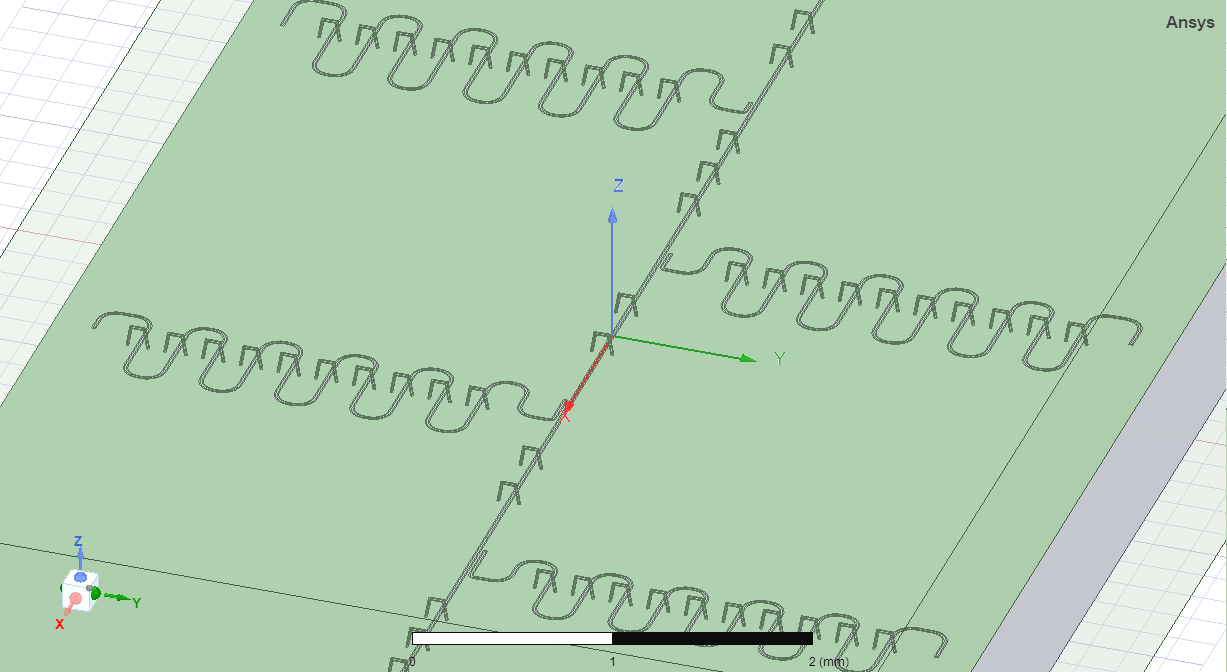

WindowsPath('C:/Users/inesc/Desktop/Coding/qiskit-metal/My Notebooks/ansys.png')

09:31AM 32s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



In [22]:
eig_qres.sim.convergence_t, eig_qres.sim.convergence_f, _ = hfss.get_convergences()
eig_qres.sim.plot_convergences()
print(eig_qres.sim.convergence_f)
eig_qres.sim.save_screenshot()

INFO 09:31AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


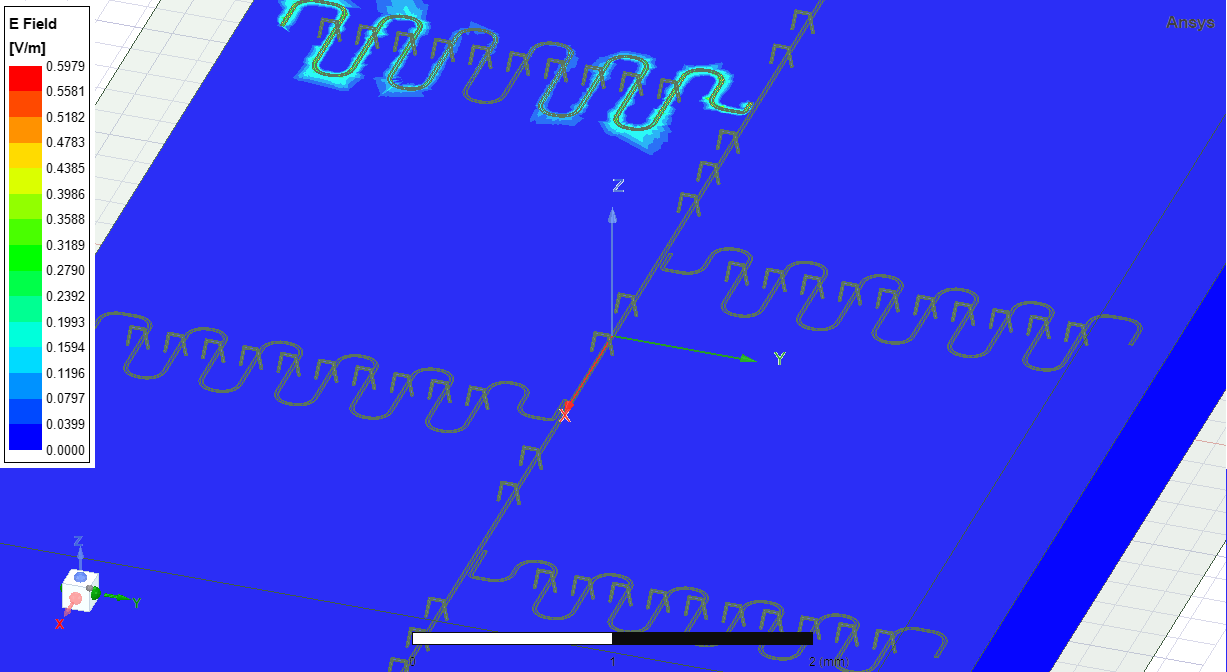

WindowsPath('C:/Users/inesc/Desktop/Coding/qiskit-metal/My Notebooks/ansys.png')

In [23]:
eig_qres.sim.plot_fields('main', eigenmode=1)
eig_qres.sim.save_screenshot()

INFO 09:31AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


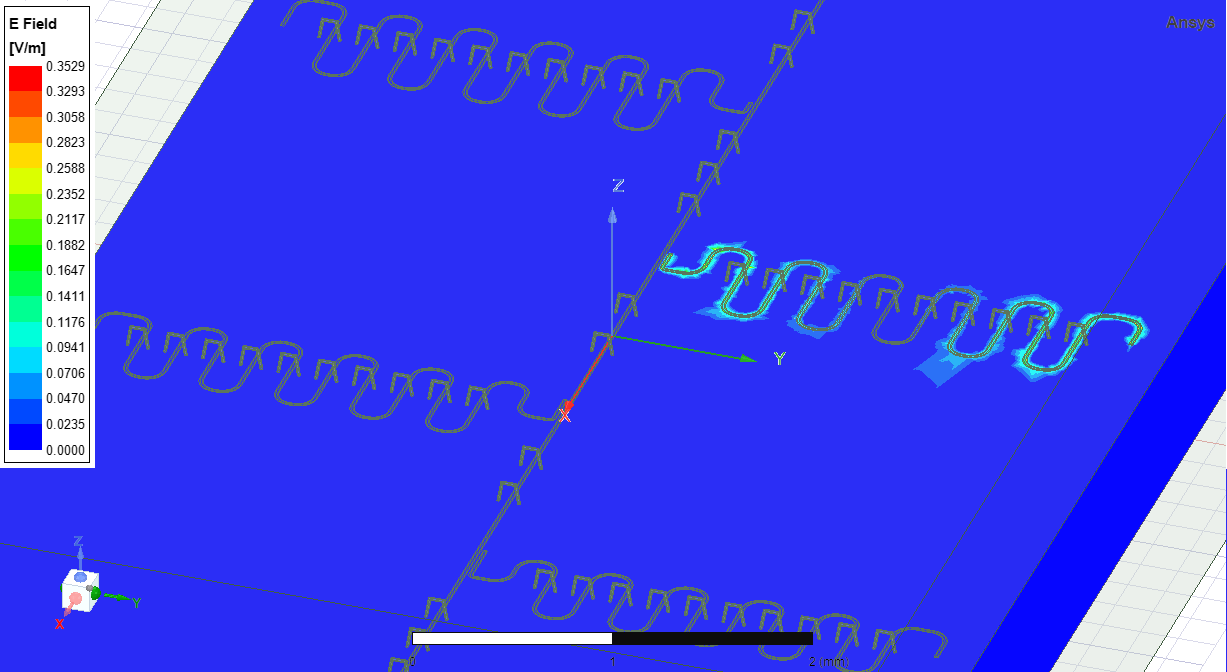

WindowsPath('C:/Users/inesc/Desktop/Coding/qiskit-metal/My Notebooks/ansys.png')

09:31AM 53s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



In [24]:
eig_qres.sim.plot_fields('main', eigenmode=2)
eig_qres.sim.save_screenshot()

INFO 09:31AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


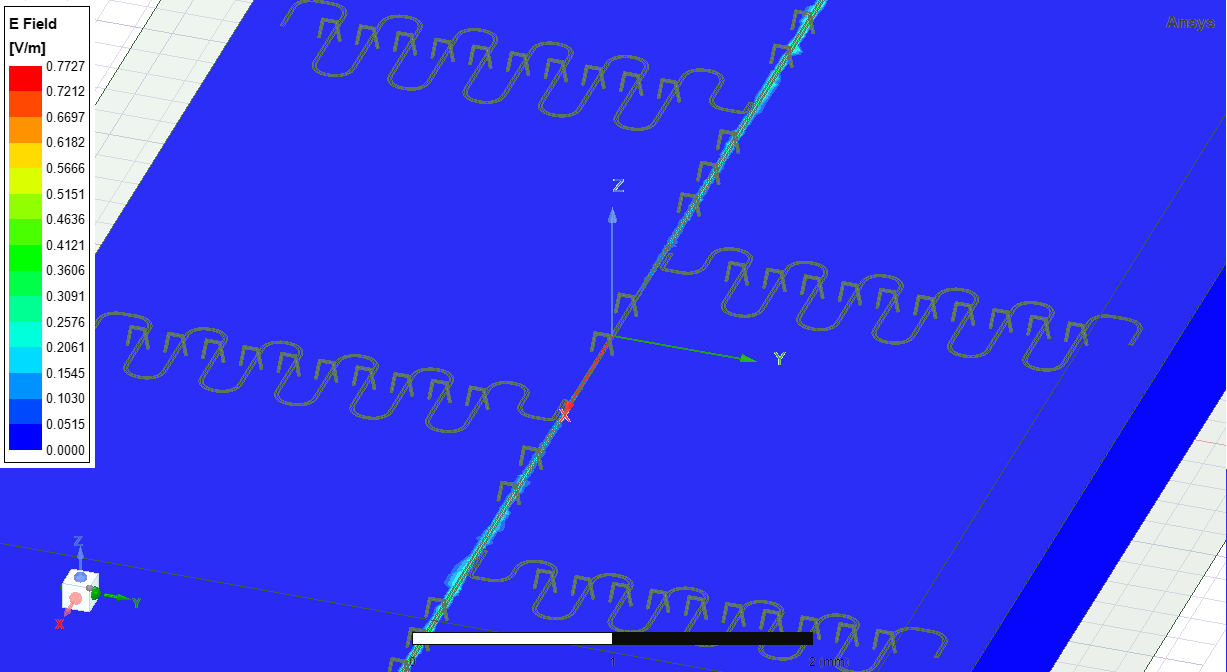

WindowsPath('C:/Users/inesc/Desktop/Coding/qiskit-metal/My Notebooks/ansys.png')

In [25]:
eig_qres.sim.plot_fields('main', eigenmode=3)
eig_qres.sim.save_screenshot()

INFO 09:32AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


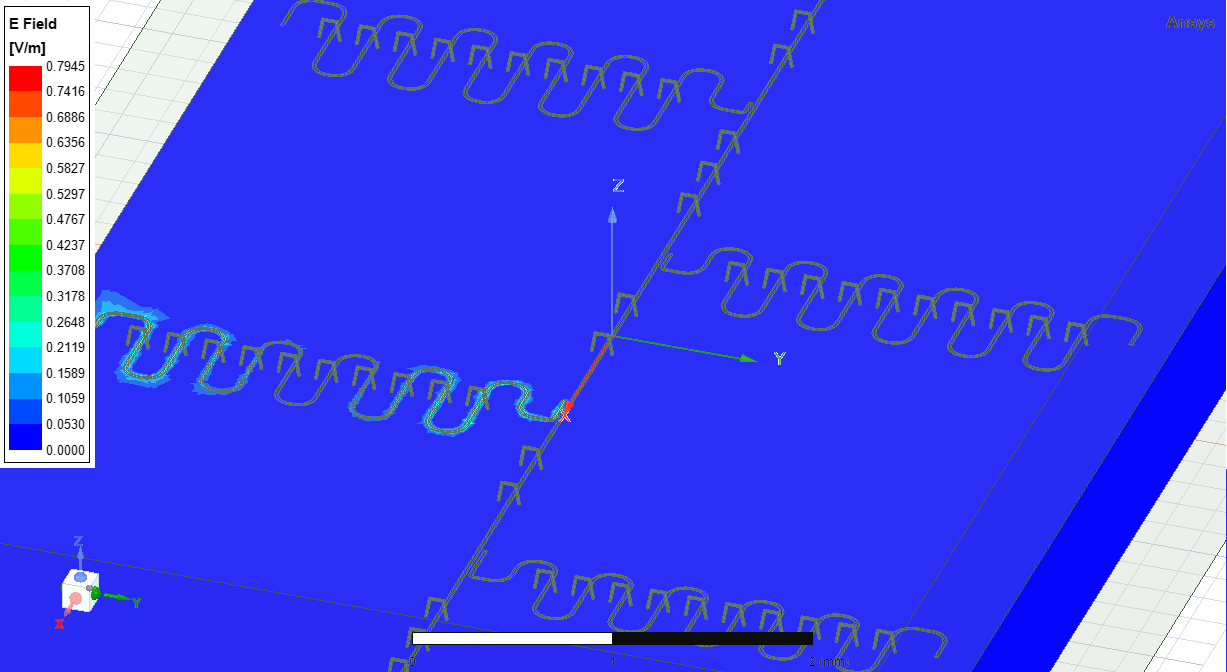

WindowsPath('C:/Users/inesc/Desktop/Coding/qiskit-metal/My Notebooks/ansys.png')

09:32AM 22s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



In [26]:
eig_qres.sim.plot_fields('main', eigenmode=4)
eig_qres.sim.save_screenshot()

INFO 09:32AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


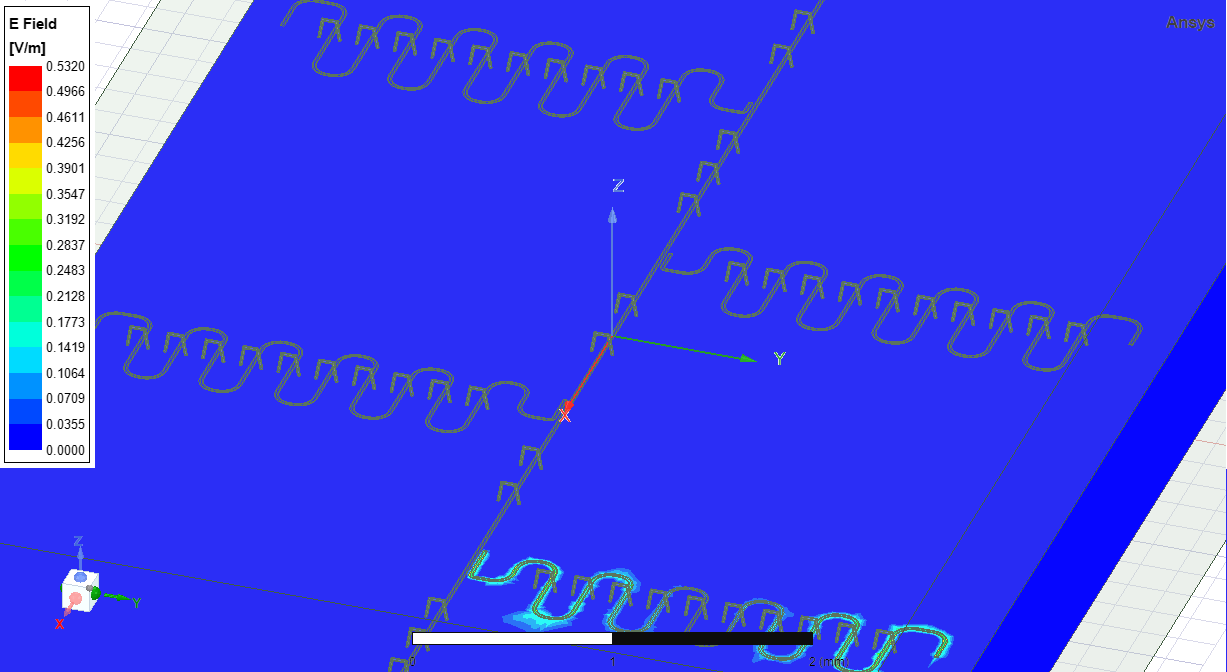

WindowsPath('C:/Users/inesc/Desktop/Coding/qiskit-metal/My Notebooks/ansys.png')

In [27]:
eig_qres.sim.plot_fields('main', eigenmode=5)
eig_qres.sim.save_screenshot()

In [28]:
hfss.close()

True

09:32AM 39s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

